In [420]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [337]:
dataframes =[]
for i in range(10):
    dataframes.append(pd.read_csv(f"states{i}.csv").drop("Unnamed: 0",axis=1))

In [339]:
data = pd.concat(dataframes,ignore_index=True)

In [341]:
data.duplicated().sum()

9

In [343]:
data.drop_duplicates(inplace=True,ignore_index=True)

In [345]:
data.duplicated().sum()

0

In [347]:
data.head(7)

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F
5,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,$64657.801787164906,2648667M_2630239F
6,Connecticut,3593222,15.604830917874388%,67.6770531400966%,10.34806763285027%,0.12620772946859898%,4.021980676328502%,0.018599033816425123%,$76146.5605875153,1751607M_1841615F


In [349]:
# data.White = data.White.str.replace("%", "").astype(float)*100
# data.Black = data.Black.str.replace("%", "").astype(float)*100
# data.Native = data.Native.str.replace("%", "").astype(float)*100
# data.Asian = data.Asian.str.replace("%", "").astype(float)*100
# data.Pacific = data.Pacific.str.replace("%", "").astype(float)*100

In [351]:
for col in ["Hispanic","White", "Black", "Native", "Asian", "Pacific"]:
    data[col] = data[col].str.replace("%", "").astype(float)

In [353]:
data.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,Alabama,4830620,3.751616,61.878656,31.252976,0.453231,1.050255,0.034354,$43296.35860306644,2341093M_2489527F
1,Alaska,733375,5.909581,60.910180,2.848503,16.391018,5.450299,1.058683,$70354.74390243902,384160M_349215F
2,Arizona,6641928,29.565921,57.120000,3.850987,4.355066,2.876579,0.167632,$54207.82095490716,3299088M_3342840F
3,Arkansas,2958208,6.215474,71.137810,18.968759,0.522920,1.142336,0.146861,$41935.63396778917,1451913M_1506295F
4,California,38421464,37.291875,40.215789,5.677396,0.405292,13.052234,0.351410,$67264.78230266465,19087135M_19334329F


In [355]:
data["Pacific"] = data["Pacific"].fillna(data.apply(lambda row: 100 - (row["Hispanic"] + row["White"] + row["Black"] + row["Asian"]), axis=1))


In [357]:
# data.apply(lambda row: print(row["Hispanic"]))

In [359]:
data.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,Alabama,4830620,3.751616,61.878656,31.252976,0.453231,1.050255,0.034354,$43296.35860306644,2341093M_2489527F
1,Alaska,733375,5.909581,60.910180,2.848503,16.391018,5.450299,1.058683,$70354.74390243902,384160M_349215F
2,Arizona,6641928,29.565921,57.120000,3.850987,4.355066,2.876579,0.167632,$54207.82095490716,3299088M_3342840F
3,Arkansas,2958208,6.215474,71.137810,18.968759,0.522920,1.142336,0.146861,$41935.63396778917,1451913M_1506295F
4,California,38421464,37.291875,40.215789,5.677396,0.405292,13.052234,0.351410,$67264.78230266465,19087135M_19334329F


In [361]:
data["Income"] = data["Income"].str.replace("$", "").astype(float)

In [363]:
data.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,Alabama,4830620,3.751616,61.878656,31.252976,0.453231,1.050255,0.034354,43296.358603,2341093M_2489527F
1,Alaska,733375,5.909581,60.910180,2.848503,16.391018,5.450299,1.058683,70354.743902,384160M_349215F
2,Arizona,6641928,29.565921,57.120000,3.850987,4.355066,2.876579,0.167632,54207.820955,3299088M_3342840F
3,Arkansas,2958208,6.215474,71.137810,18.968759,0.522920,1.142336,0.146861,41935.633968,1451913M_1506295F
4,California,38421464,37.291875,40.215789,5.677396,0.405292,13.052234,0.351410,67264.782303,19087135M_19334329F


In [365]:
data[["male","female"]]=data.GenderPop.str.split("_",expand=True)

In [422]:
data.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,male,female
0,Alabama,4830620,3.751616,61.878656,31.252976,0.453231,1.050255,0.034354,43296.358603,2341093M_2489527F,2341093,2489527
1,Alaska,733375,5.909581,60.910180,2.848503,16.391018,5.450299,1.058683,70354.743902,384160M_349215F,384160,349215
2,Arizona,6641928,29.565921,57.120000,3.850987,4.355066,2.876579,0.167632,54207.820955,3299088M_3342840F,3299088,3342840
3,Arkansas,2958208,6.215474,71.137810,18.968759,0.522920,1.142336,0.146861,41935.633968,1451913M_1506295F,1451913,1506295
4,California,38421464,37.291875,40.215789,5.677396,0.405292,13.052234,0.351410,67264.782303,19087135M_19334329F,19087135,19334329


In [369]:
data["male"] = data["male"].str.replace("M", "").astype(int)
data["female"] = data["female"].str.replace("F", "")

In [399]:
data["female"] = data["female"].apply(lambda x: "0" if x == '' else x).astype(int)

In [403]:
data.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,male,female
0,Alabama,4830620,3.751616,61.878656,31.252976,0.453231,1.050255,0.034354,43296.358603,2341093M_2489527F,2341093,2489527
1,Alaska,733375,5.909581,60.910180,2.848503,16.391018,5.450299,1.058683,70354.743902,384160M_349215F,384160,349215
2,Arizona,6641928,29.565921,57.120000,3.850987,4.355066,2.876579,0.167632,54207.820955,3299088M_3342840F,3299088,3342840
3,Arkansas,2958208,6.215474,71.137810,18.968759,0.522920,1.142336,0.146861,41935.633968,1451913M_1506295F,1451913,1506295
4,California,38421464,37.291875,40.215789,5.677396,0.405292,13.052234,0.351410,67264.782303,19087135M_19334329F,19087135,19334329


#### 1. The first visualization your boss wants you to make is a scatterplot that shows average income in a state vs proportion of women in that state.

<Axes: xlabel='None', ylabel='Income'>

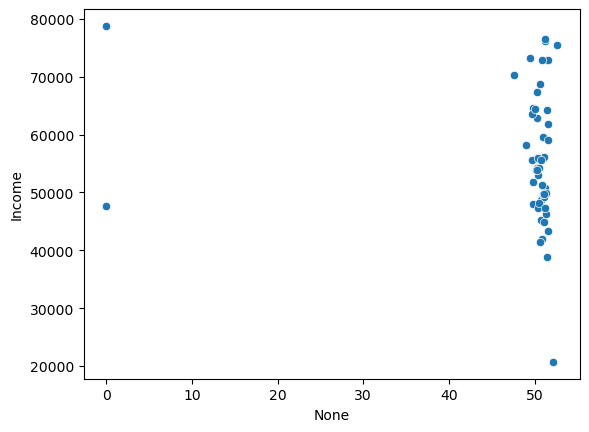

In [418]:
sns.scatterplot(y=data["Income"],x=(data["female"] / data["TotalPop"])*100)

<Figure size 1200x800 with 0 Axes>

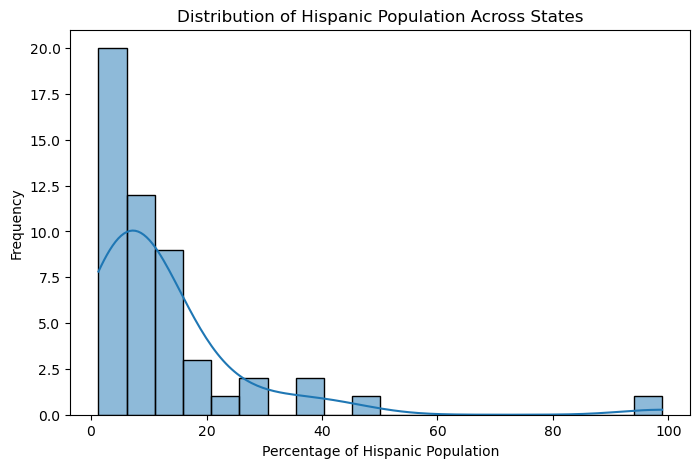

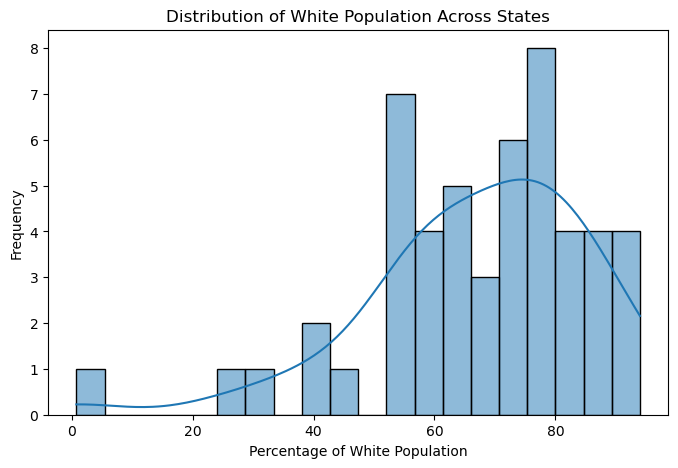

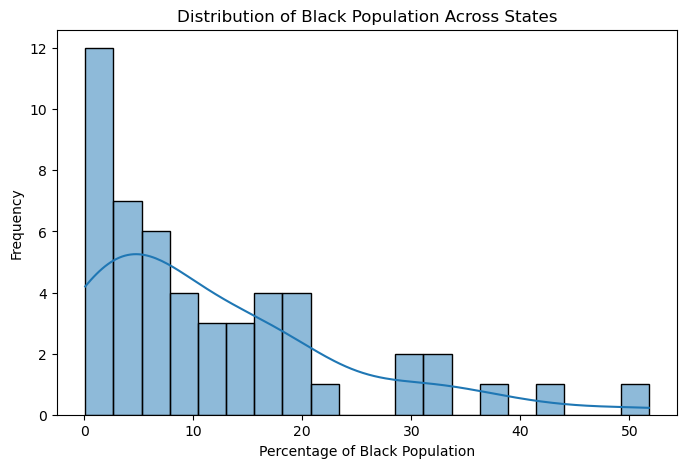

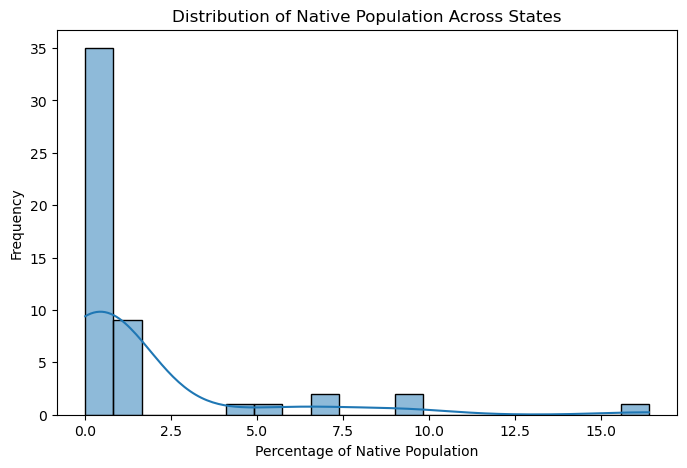

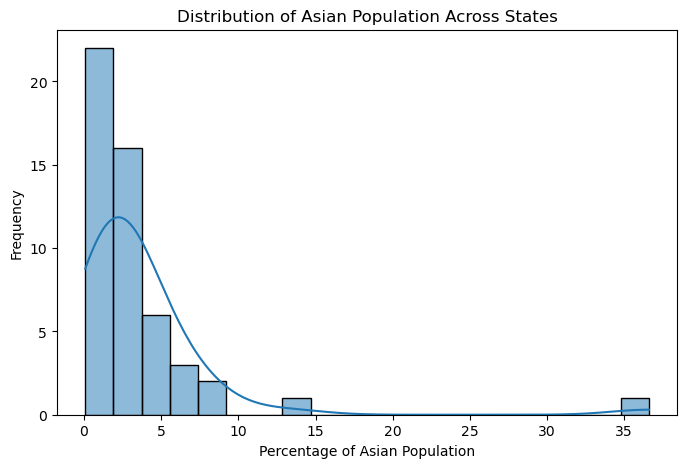

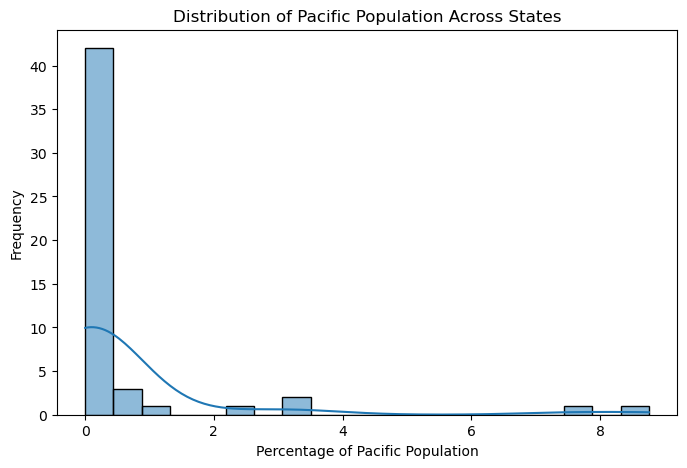

In [424]:
# Set figure size
plt.figure(figsize=(12, 8))

# Loop through race columns and create histograms
for col in ["Hispanic","White", "Black", "Native", "Asian", "Pacific"]:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[col], bins=20, kde=True)
    plt.xlabel(f"Percentage of {col} Population")
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {col} Population Across States")
    plt.show()


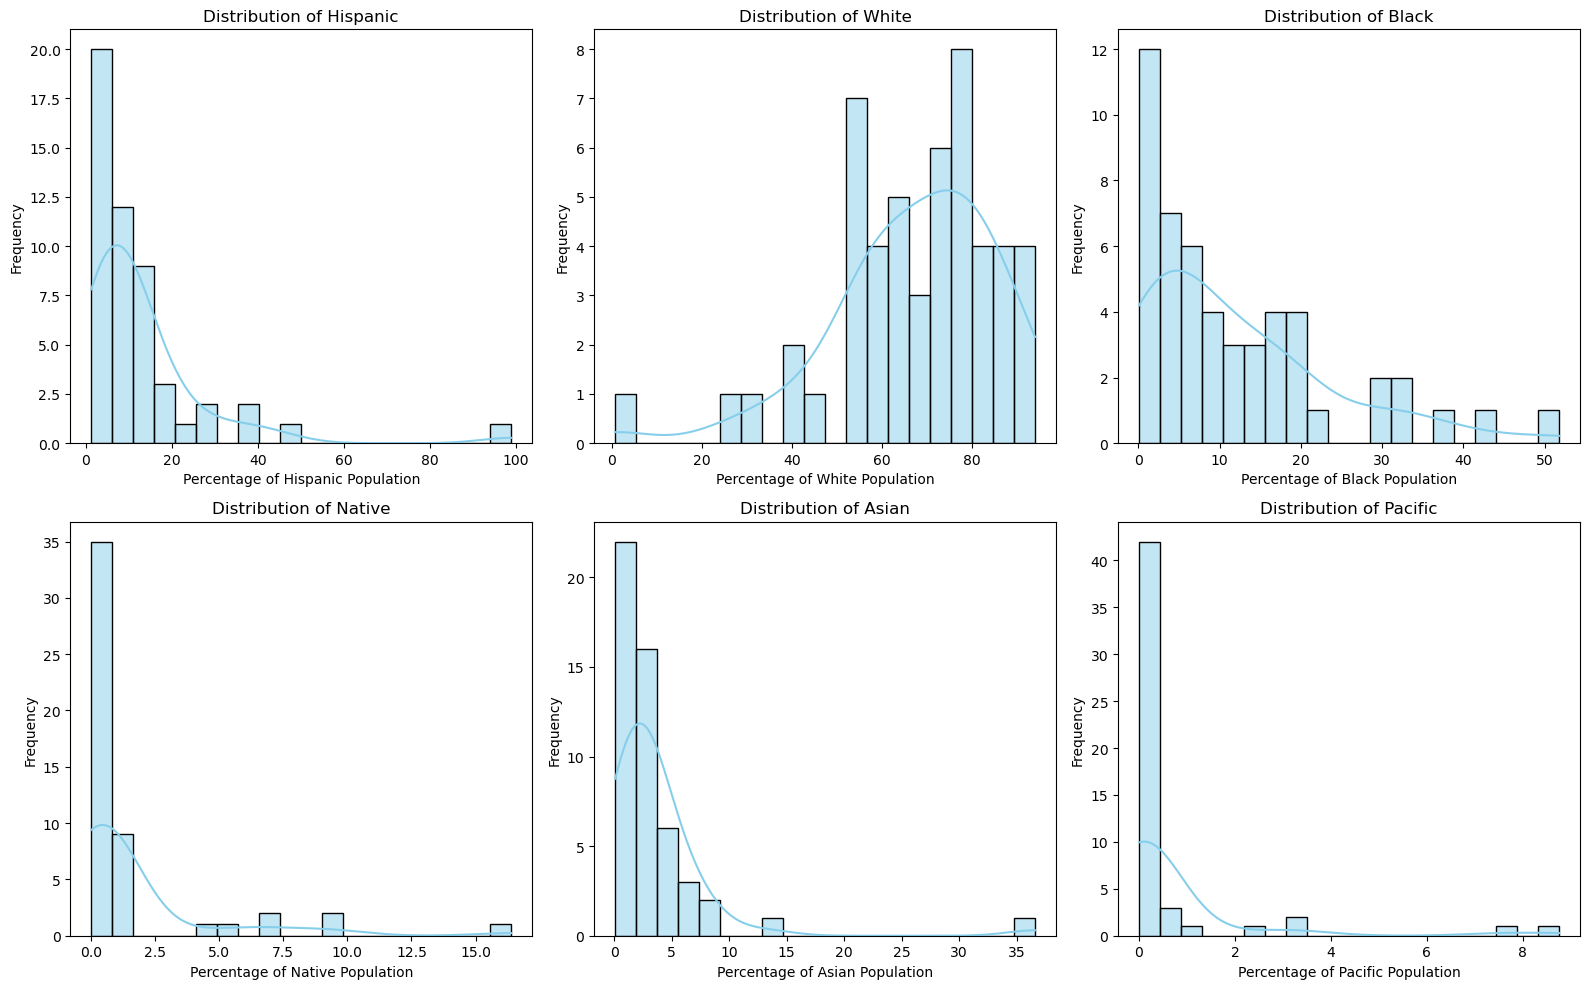

In [428]:
import matplotlib.pyplot as plt
import seaborn as sns

race_cols = ["Hispanic", "White", "Black", "Native", "Asian", "Pacific"]

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for ax, col in zip(axes, race_cols): 
    sns.histplot(data[col], bins=20, kde=True, ax=ax, color='skyblue', edgecolor='black')
    ax.set_xlabel(f"Percentage of {col} Population")
    ax.set_ylabel("Frequency")
    ax.set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()
